A.Performing basics pre-processing steps

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from dmba import classificationSummary

ModuleNotFoundError: No module named 'dmba'

In [5]:
! pip install dmba

  Obtaining dependency information for dmba from https://files.pythonhosted.org/packages/e5/ec/b58a6ea1bd4cd6ceb7d74718655a1beb777eefebcbf52d89cbab4fd9eb66/dmba-0.2.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   --- ------------------------------------ 1.1/11.8 MB 34.0 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.8 MB 30.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.8 MB 30.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.3/11.8 MB 25.1 MB/s eta 0:00:01
   ------------------- -------------------- 5.8/11.8 MB 26.3 MB/s eta 0:00:01
   ------------------------ --------------- 7.3/11.8 MB 27.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.8/11.8 MB 25.0 MB/s eta 0:00:01
   ---------------------------- -------

In [6]:
# Reading datafile
df = pd.read_csv('FlightDelays.csv')

In [7]:
# Summarizing stats
statistics = df.describe()
print("Basic Statistics:")
print(statistics)

Basic Statistics:
       CRS_DEP_TIME     DEP_TIME     DISTANCE       FL_NUM      Weather  \
count   2201.000000  2201.000000  2201.000000  2201.000000  2201.000000   
mean    1371.938664  1369.298955   211.871422  3815.086324     0.014539   
std      432.697149   442.462754    13.316815  2409.750224     0.119725   
min      600.000000    10.000000   169.000000   746.000000     0.000000   
25%     1000.000000  1004.000000   213.000000  2156.000000     0.000000   
50%     1455.000000  1450.000000   214.000000  2385.000000     0.000000   
75%     1710.000000  1709.000000   214.000000  6155.000000     0.000000   
max     2130.000000  2330.000000   229.000000  7924.000000     1.000000   

          DAY_WEEK  DAY_OF_MONTH  
count  2201.000000   2201.000000  
mean      3.905498     16.024989  
std       1.903149      8.677390  
min       1.000000      1.000000  
25%       2.000000      8.000000  
50%       4.000000     16.000000  
75%       5.000000     23.000000  
max       7.000000     31.

In [8]:
# Handling missing values
# count of missing values for each column
print("Count of Missing Values:")
print(df.isnull().sum())

Count of Missing Values:
CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64


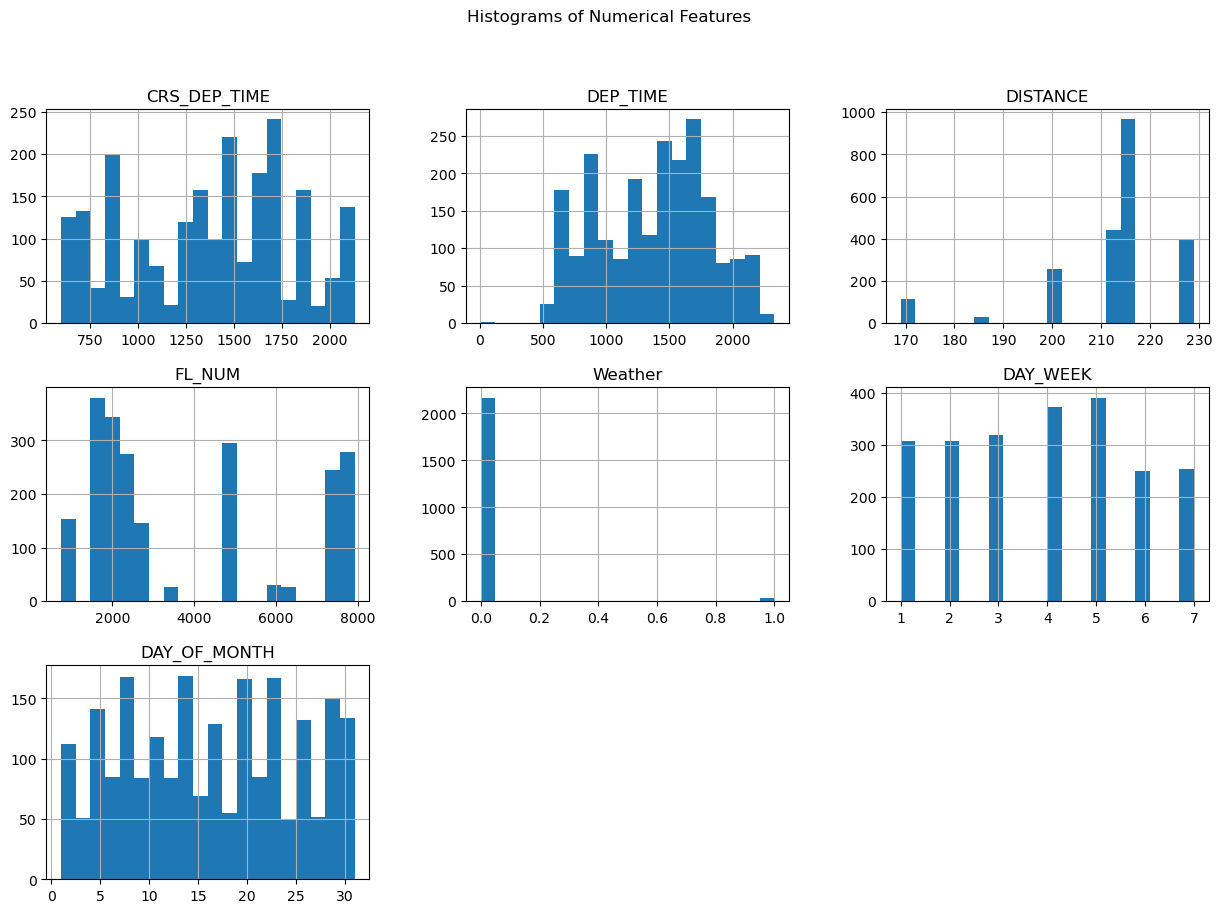

In [9]:
# Displaying histograms for numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

C:\Users\devwa\AppData\Local\Temp\ipykernel_35736\2878499712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


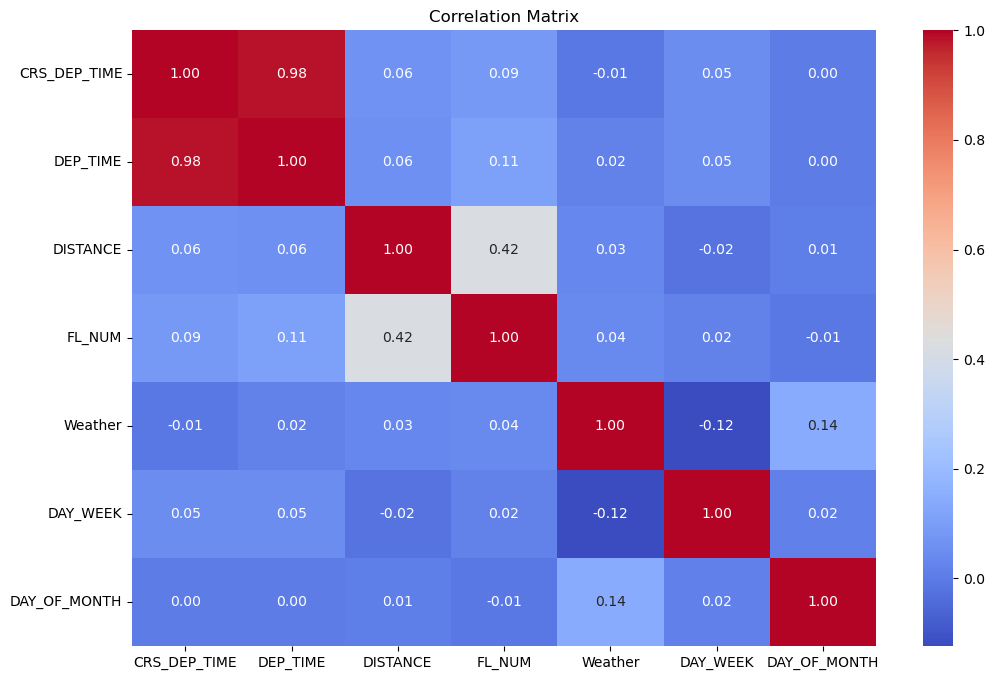

In [10]:
# Displaying correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

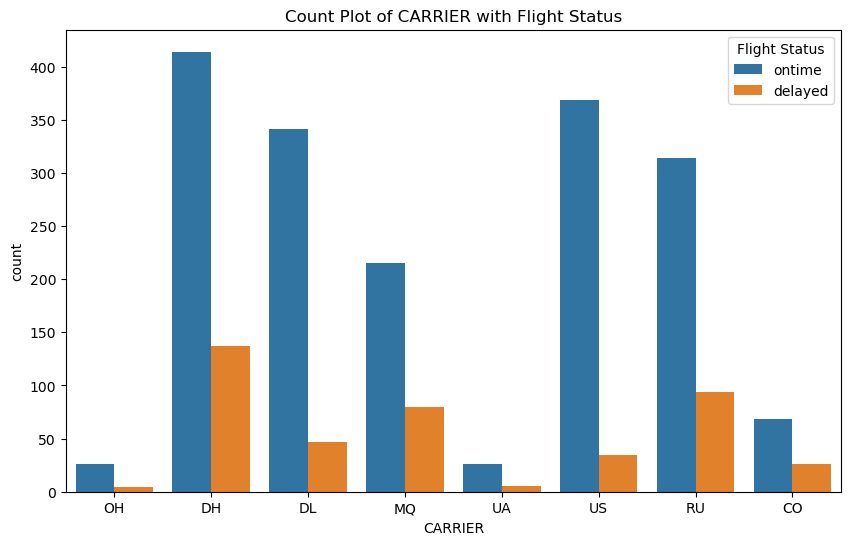

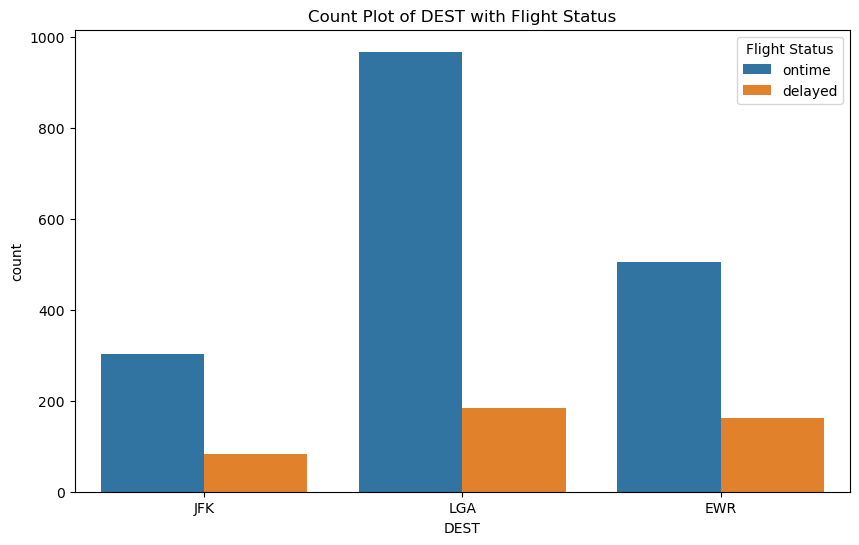

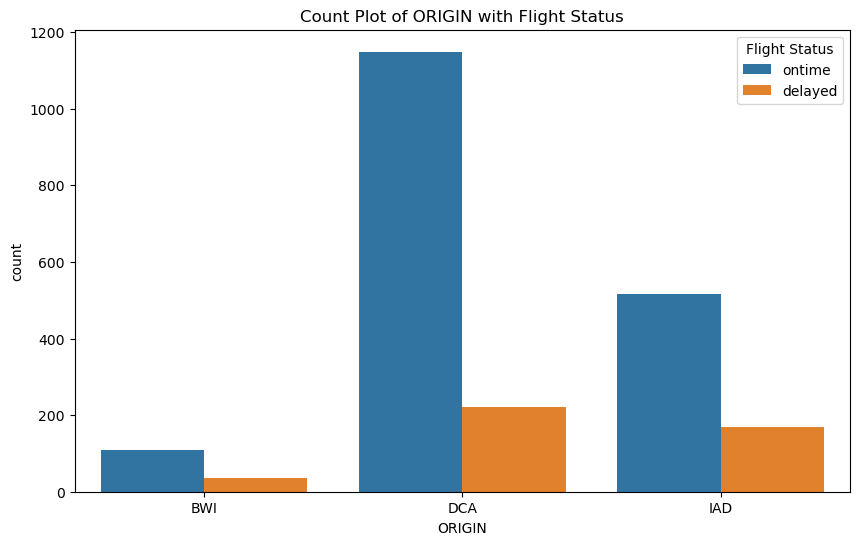

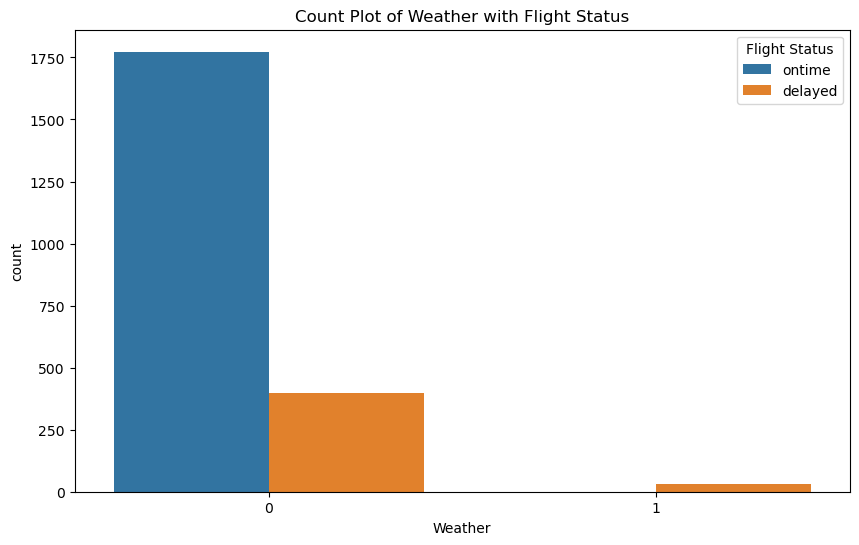

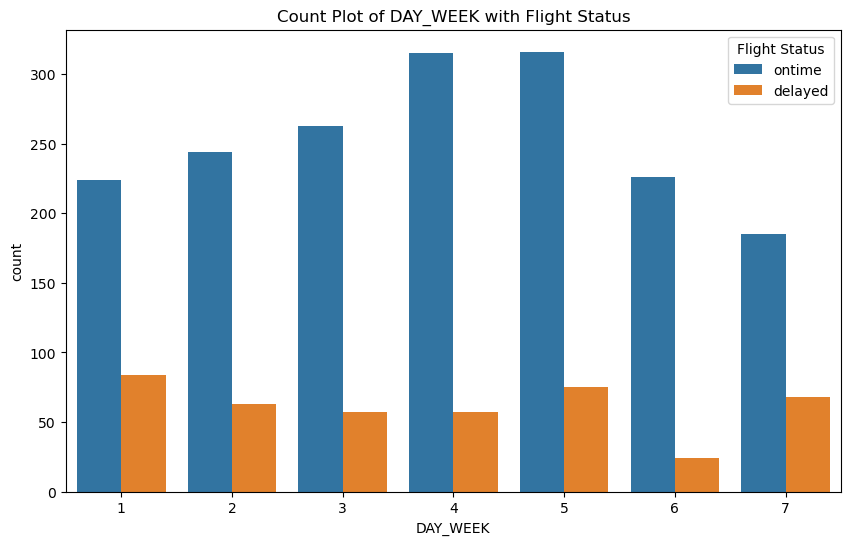

In [11]:
# Displaying count plots for categorical features
categorical_features = ['CARRIER', 'DEST', 'ORIGIN', 'Weather', 'DAY_WEEK']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, hue='Flight Status')
    plt.title(f'Count Plot of {feature} with Flight Status')
    plt.show()

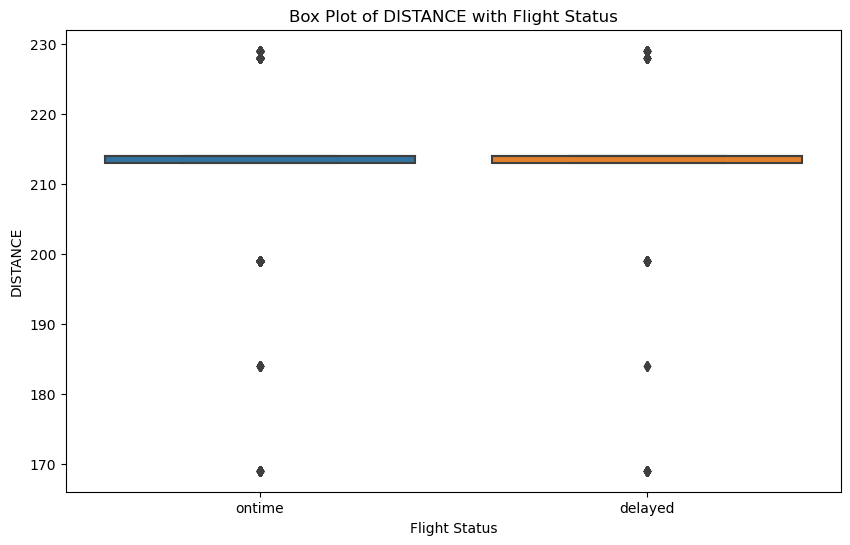

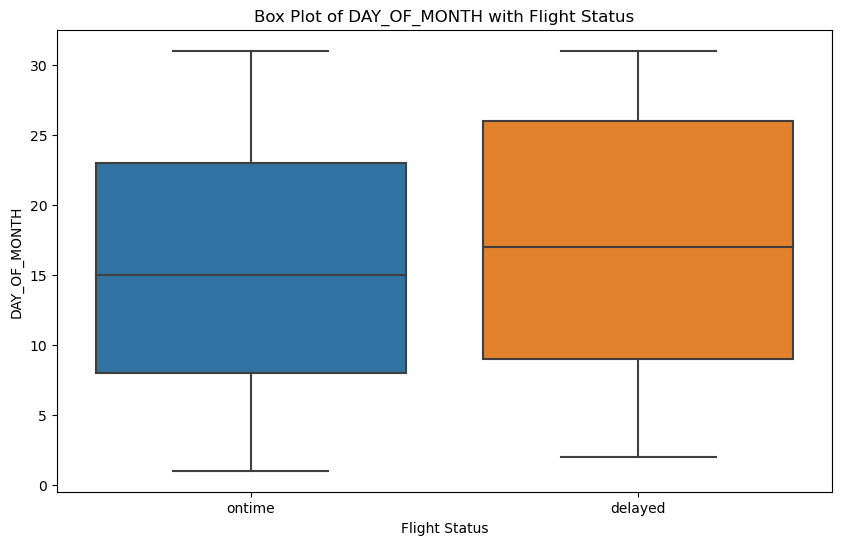

In [12]:
# Visualizing variabilities, e.g., box plots
variability_features = ['DISTANCE', 'DAY_OF_MONTH']
for feature in variability_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Flight Status', y=feature, data=df)
    plt.title(f'Box Plot of {feature} with Flight Status')
    plt.show()

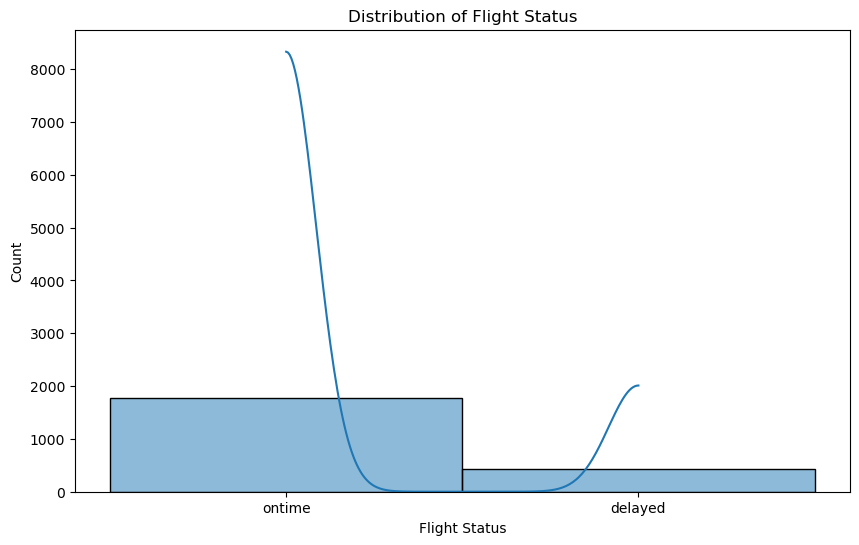

In [13]:
# Visualizing delays distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Flight Status'], bins=30, kde=True)
plt.title('Distribution of Flight Status')
plt.xlabel('Flight Status')
plt.show()

In [14]:
# Calculating the standard deviation of 'DISTANCE'
distance_std = df['DISTANCE'].std()
print(f"\nStandard Deviation of DISTANCE: {distance_std}")


Standard Deviation of DISTANCE: 13.31681460083937


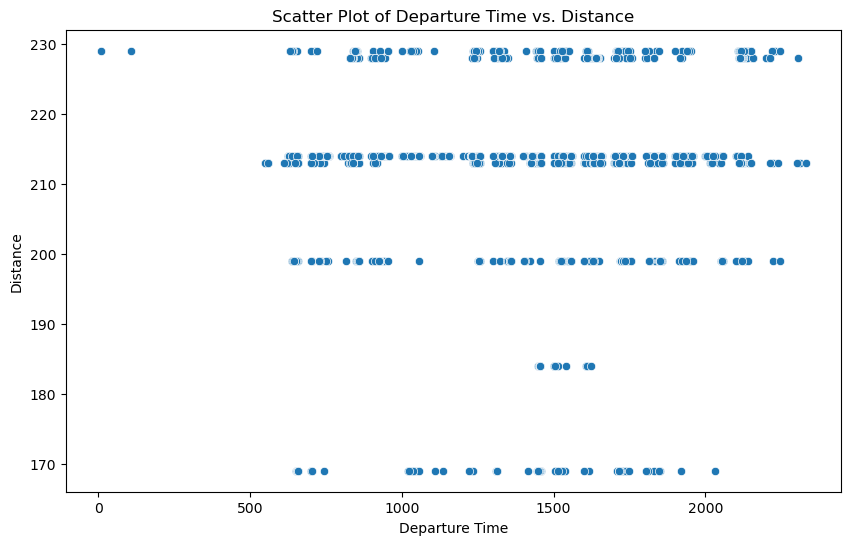

In [15]:
# Visualizing the relationship between 'DEP_TIME' and 'DISTANCE'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEP_TIME', y='DISTANCE', data=df)
plt.title('Scatter Plot of Departure Time vs. Distance')
plt.xlabel('Departure Time')
plt.ylabel('Distance')
plt.show()

B.Using KNN algorithm

In [16]:
# Adding index
df['Number'] = df.index + 1
df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Number
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,1
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime,2
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime,3
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,4
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime,2197
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime,2198
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime,2199
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime,2200


In [17]:
# Droping unnecessary columns
columns_to_drop = ['FL_DATE', 'FL_NUM', 'TAIL_NUM', 'CARRIER', 'DEST', 'ORIGIN', 'Weather']
df = df.drop(columns=columns_to_drop)

In [18]:
df

,CRS_DEP_TIME,DEP_TIME,DISTANCE,DAY_WEEK,DAY_OF_MONTH,Flight Status,Number
0,1455,1455,184,4,1,ontime,1
1,1640,1640,213,4,1,ontime,2
2,1245,1245,229,4,1,ontime,3
3,1715,1709,229,4,1,ontime,4
4,1039,1035,229,4,1,ontime,5
...,...,...,...,...,...,...,...
2196,645,644,199,6,31,ontime,2197
2197,1700,1653,213,6,31,ontime,2198
2198,1600,1558,199,6,31,ontime,2199
2199,1359,1403,199,6,31,ontime,2200


In [19]:
# Handling missing values if any
df = df.dropna()

In [20]:
# Split the data into training (60%) and testing (40%)
trainData, validData = train_test_split(df,test_size=0.4, random_state=24)
print(trainData.shape, validData.shape)

(1320, 7) (881, 7)


In [21]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'DAY_WEEK', 'DAY_OF_MONTH']]) 

# Transform the full dataset
delayNorm = pd.concat([pd.DataFrame(scaler.transform(df[['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'DAY_WEEK', 'DAY_OF_MONTH']]),columns=['zCRS_DEP_TIME', 'zDEP_TIME', 'zDISTANCE', 'zDAY_WEEK', 'zDAY_OF_MONTH']),df[['Flight Status', 'Number']]], axis=1)
trainNorm = delayNorm.iloc[trainData.index]
validNorm = delayNorm.iloc[validData.index]

In [22]:
train_X = trainNorm[['zCRS_DEP_TIME', 'zDEP_TIME', 'zDISTANCE', 'zDAY_WEEK', 'zDAY_OF_MONTH']]
train_y = trainNorm['Flight Status']
valid_X = validNorm[['zCRS_DEP_TIME', 'zDEP_TIME', 'zDISTANCE', 'zDAY_WEEK', 'zDAY_OF_MONTH']]
valid_y = validNorm['Flight Status']

In [23]:
# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({'k': k,
                    'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
                   })

In [24]:
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.774120
1    2  0.708286
2    3  0.784336
3    4  0.767310
4    5  0.799092
5    6  0.787741
6    7  0.800227
7    8  0.785471
8    9  0.800227
9   10  0.797957
10  11  0.802497
11  12  0.801362
12  13  0.809308
13  14  0.808173


In [25]:
# Classification report
from sklearn.metrics import classification_report
y_predict=knn.predict(valid_X)
print(classification_report(valid_y, y_predict))

              precision    recall  f1-score   support

     delayed       0.51      0.12      0.20       170
      ontime       0.82      0.97      0.89       711

    accuracy                           0.81       881
   macro avg       0.67      0.55      0.55       881
weighted avg       0.76      0.81      0.76       881



Using Naive Bayes algorithm

In [26]:
df.DAY_WEEK = df.DAY_WEEK.astype('category')

In [27]:
df.DAY_WEEK

0       4
1       4
2       4
3       4
4       4
       ..
2196    6
2197    6
2198    6
2199    6
2200    6
Name: DAY_WEEK, Length: 2201, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

In [28]:
#Create hourly bins departure time 
df.CRS_DEP_TIME = [round(t / 100) for t in df.CRS_DEP_TIME]
df.CRS_DEP_TIME = df.CRS_DEP_TIME.astype('category')

In [29]:
predictors = ['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'DAY_WEEK', 'DAY_OF_MONTH']
outcome = 'Flight Status'
X = pd.get_dummies(df[predictors])
y = df['Flight Status']
classes = ['ontime', 'delayed']

In [30]:
# splitting into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=9)

In [31]:
# running naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [32]:
# predicting probabilities 
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

In [33]:
# predicting class 
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)

In [34]:
predProb_train

array([[4.97292986e-06, 9.99995027e-01],
       [1.28795479e-06, 9.99998712e-01],
       [9.96391447e-01, 3.60855293e-03],
       ...,
       [9.97807643e-01, 2.19235735e-03],
       [6.50550512e-07, 9.99999349e-01],
       [1.63515163e-06, 9.99998365e-01]])

In [35]:
predProb_valid

array([[0.94629847, 0.05370153],
       [0.88426909, 0.11573091],
       [0.97988389, 0.02011611],
       ...,
       [0.91568818, 0.08431182],
       [0.9828051 , 0.0171949 ],
       [0.6401336 , 0.3598664 ]])

In [36]:
y_valid_pred

array(['delayed', 'delayed', 'delayed', 'ontime', 'ontime', 'ontime',
       'delayed', 'delayed', 'delayed', 'delayed', 'ontime', 'delayed',
       'ontime', 'ontime', 'ontime', 'delayed', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'delayed',
       'delayed', 'ontime', 'delayed', 'delayed', 'delayed', 'ontime',
       'delayed', 'delayed', 'delayed', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'delayed', 'ontime', 'ontime', 'ontime',
       'delayed', 'ontime', 'delayed', 'ontime', 'ontime', 'ontime',
       'ontime', 'delayed', 'delayed', 'delayed', 'delayed', 'delayed',
       'ontime', 'ontime', 'ontime', 'delayed', 'ontime', 'delayed',
       'ontime', 'delayed', 'delayed', 'ontime', 'ontime', 'ontime',
       'ontime', 'delayed', 'ontime', 'delayed', 'delayed', 'ontime',
       'delayed', 'delayed', 'ontime', 'ontime', 'delayed', 'delayed',
       'ontime', 'ontime', 'delayed', 'ontime', 'ontime', 'delayed',
       'delayed', 'delay

In [37]:
y_train_pred

array(['ontime', 'ontime', 'delayed', ..., 'delayed', 'ontime', 'ontime'],
      dtype='<U7')

In [38]:
# Finding accuracy
nb_predictions = delays_nb.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, nb_predictions))

Accuracy: 0.623155505107832


In [39]:
# Classification report
print(classification_report(y_valid, nb_predictions))

              precision    recall  f1-score   support

     delayed       0.30      0.63      0.40       179
      ontime       0.87      0.62      0.72       702

    accuracy                           0.62       881
   macro avg       0.58      0.62      0.56       881
weighted avg       0.75      0.62      0.66       881



*C. Trying a new algorithm to see performance*

In [40]:
# Importing necessary libraries for SVM algorithm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Import Support Vector Classification (SVC)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [41]:
# Defining your features and target variables for training
features_train = trainData.drop("Flight Status", axis=1)  # Drop the target variable
target_train = trainData["Flight Status"]

In [42]:
# Defining your features and target variables for testing
features_test = validData.drop("Flight Status", axis=1)
target_test = validData["Flight Status"]

In [43]:
# Handling categorical variables
features_train_encoded = pd.get_dummies(features_train)
features_test_encoded = pd.get_dummies(features_test)

In [44]:
# Matching columns in both sets 
common_columns = set(features_train_encoded.columns) & set(features_test_encoded.columns)

features_train_encoded = features_train_encoded[common_columns]
features_test_encoded = features_test_encoded[common_columns]

C:\Users\devwa\AppData\Local\Temp\ipykernel_35736\3408023869.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_train_encoded = features_train_encoded[common_columns]
C:\Users\devwa\AppData\Local\Temp\ipykernel_35736\3408023869.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_test_encoded = features_test_encoded[common_columns]


In [45]:
model = SVC(kernel='linear', probability=True)

In [ ]:
# Training the model on the training data
model.fit(features_train_encoded, target_train)

In [47]:
# Making predictions on the testing data
predictions = model.predict(features_test_encoded)

In [48]:
print("Training Features:", features_train_encoded.columns)
print("Testing Features:", features_test_encoded.columns)

Training Features: Index(['DAY_WEEK', 'Number', 'DISTANCE', 'DAY_OF_MONTH', 'CRS_DEP_TIME',
       'DEP_TIME'],
      dtype='object')
Testing Features: Index(['DAY_WEEK', 'Number', 'DISTANCE', 'DAY_OF_MONTH', 'CRS_DEP_TIME',
       'DEP_TIME'],
      dtype='object')


In [49]:
# Matching the columns through encoding
features_test_encoded = features_test_encoded[features_train_encoded.columns]

In [50]:
# Evaluating the model through libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
# Finding accuracy and classification
print("Accuracy:", accuracy_score(target_test, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(target_test, predictions))
print("\nClassification Report:")
print(classification_report(target_test, predictions))

Accuracy: 0.9001135073779796

Confusion Matrix:
[[ 92  78]
 [ 10 701]]

Classification Report:
              precision    recall  f1-score   support

     delayed       0.90      0.54      0.68       170
      ontime       0.90      0.99      0.94       711

    accuracy                           0.90       881
   macro avg       0.90      0.76      0.81       881
weighted avg       0.90      0.90      0.89       881

